In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
#download data
df=pd.read_csv('creditcard.csv')

In [4]:
df.shape

(284807, 31)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
#check for missing value
df.apply(lambda x: sum(x.isnull()))

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
print('No missing value')

No missing value


In [13]:
#check for categorical values
df.apply(lambda x:len(x.unique()))

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [14]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
#It can be observed there are no missing values however the range of values differ amoung the independent variables
#hence its necessary to normalise the variables

In [17]:
df=df.drop(['Time'],axis=1)

In [18]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
df_corr=df.copy()
del df_corr['Class']

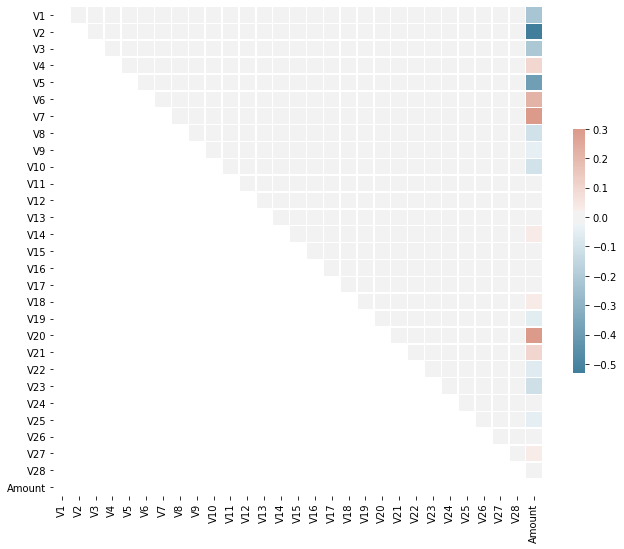

In [26]:
corr=df_corr.corr()
import seaborn as sns
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [27]:
corr

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,...,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709
V2,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,...,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409
V3,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,...,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880
V4,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,...,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732
V5,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,...,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356
V6,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,...,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981
V7,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,...,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311
V8,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,...,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079
V9,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,...,-4.340941e-16,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246
V10,7.433820e-17,-4.782388e-16,6.289267e-16,6.055490e-16,-6.601716e-16,2.850776e-16,3.043333e-17,9.051847e-17,-2.771761e-16,1.000000e+00,...,-1.141888e-15,8.089504e-16,-6.707598e-16,3.809732e-16,-4.032806e-17,-2.863813e-16,-2.554293e-16,-3.103239e-16,-1.515934e-16,-0.101502


In [ ]:
#absolutely no-correlation


In [39]:
#analyse the class label to chk if data set is balanced
%matplotlib inline
count_classes=pd.value_counts(df.Class,sort=True).sort_index()

In [40]:
print(count_classes)

0    284315
1       492
Name: Class, dtype: int64


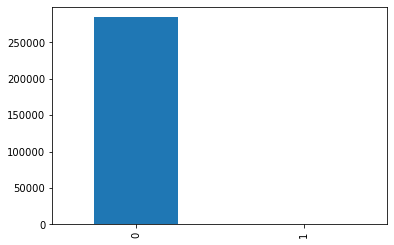

In [45]:
count_classes.plot(kind='bar')



In [46]:
#calculating baseline accurace
from __future__ import division
base_line_accuracy = 284315/(284315+492)
print(base_line_accuracy)


0.9982725143693799


In [ ]:
#It is clear that the dataset is highly imbalanced

In [47]:
#UnderSampling Technique

In [58]:
no_frauds=len(df[df.Class==1])

In [59]:
no_frauds

492

In [62]:
fraud_index=np.array(df[df.Class==1].index)

In [64]:
fraud_index

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [66]:
#idices of normal transactions
normal_trans=np.array(df[df.Class==0].index)

In [67]:
normal_trans

array([     0,      1,      2, ..., 284804, 284805, 284806], dtype=int64)

In [68]:
len(normal_trans)

284315

In [78]:
#Choose random normal transactions
random_normal_indice=np.random.choice(normal_trans,no_frauds,replace='False')
random_normal_indice


array([ 10062,   8318, 116775,  88423, 171786, 204697, 113882, 280019,
       129091, 177223,   9982, 214187,  21646,  68784,  13198, 128429,
       200420, 186538,    510, 128969, 237799,  45291, 134451, 247809,
       155402, 214594,  41517, 173530, 201381, 106366,  51265, 135066,
       118198, 124967, 154022, 235443,   5030, 214692, 209760,  87817,
       155067, 275461, 135152, 203075, 192931, 182414, 223359, 104160,
       271048,   4807, 190821, 195443, 167569, 151849, 219502,  26752,
       236398,  25059, 116982, 109864, 145150, 159106, 199468,  81622,
        45263,   6094,  97232, 208422, 135292, 242449, 202199,  97721,
        34659, 178329, 283387,  36713, 156207,  98983, 226417,  24153,
       258626, 118251, 154657, 147485,  22401, 128262,  87487, 236219,
        54224, 151921, 240045, 200686, 165403, 220751, 185849, 104481,
       226395,  89139, 208796, 275150,  77066, 166454, 235712, 275365,
       276015, 199796, 122833, 188783,  82134, 103176, 196834,  72917,
      

In [80]:
#combine normal random indices and fraud indices
Combined_indice=np.concatenate([fraud_index,random_normal_indice])

In [81]:
Combined_indice

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [91]:
df1=df.iloc[Combined_indice,:]

In [92]:
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238025,2.067762,-0.036121,-1.085811,0.399711,-0.096168,-1.174338,0.195877,-0.341962,0.516460,0.067932,...,-0.291391,-0.694283,0.330727,-0.018974,-0.283427,0.199156,-0.069451,-0.060233,1.29,0
48500,-0.446238,1.010544,1.435301,0.171043,-0.024026,-1.253589,0.623170,-0.077036,-0.390548,-0.496546,...,-0.234470,-0.645251,0.046743,0.657112,-0.203107,0.052108,0.241507,0.103688,1.79,0
174904,0.615897,-4.303077,-1.170248,-0.737410,-2.469009,0.420626,-0.567189,-0.044690,-0.726195,1.129621,...,-0.023621,-1.287915,-0.312503,-0.419428,-0.835324,-0.553618,-0.104583,0.090890,835.00,0
148475,-0.224997,0.659503,0.628189,-0.535859,0.091100,0.036972,-0.056127,0.073835,0.826729,-0.821442,...,0.060431,0.152590,0.057597,0.396095,-0.750581,0.244826,-0.336744,0.041754,19.66,0


In [97]:
s=len(df1[df1.Class==1])
s

492

In [96]:
p=len(df1[df1.Class==0])
p

492

In [100]:
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [101]:
df1.shape

(984, 30)

In [106]:
undersample_df=pd.value_counts(df1.Class)

In [107]:
undersample_df

1    492
0    492
Name: Class, dtype: int64

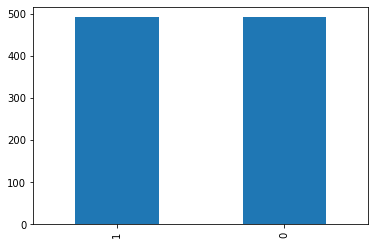

In [111]:
undersample_df.plot(kind='bar')

In [126]:
x_un_df=df1.iloc[:,df1.columns!='Class']
y_un_df=df1.iloc[:,df1.columns=='Class']

In [127]:
x_un_df.shape

(984, 29)

In [129]:
y_un_df

,Class
541,1
623,1
4920,1
6108,1
6329,1
...,...
238025,0
48500,0
174904,0
148475,0


In [131]:
#normalise
x_norm_under=(x_un_df-x_un_df.mean())/(x_un_df.max()-x_un_df.min())

In [132]:
x_norm_under

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,0.000716,0.003805,0.055960,0.101148,0.031937,-0.059716,0.004905,0.017649,-0.078804,0.000336,...,-0.003580,0.002612,-0.003776,-0.017875,0.103592,0.004278,0.041577,0.015893,-0.045028,-0.048548
623,-0.021546,-0.163933,0.135186,-0.000724,0.088623,-0.031632,0.062906,-0.006256,0.052615,0.057458,...,0.115030,0.005501,0.023503,0.056605,-0.066160,0.037474,-0.040773,-0.033925,-0.001763,0.200291
4920,0.000986,-0.002522,0.092665,0.001755,0.022918,0.045154,0.067703,-0.011683,0.054335,0.037169,...,-0.037020,-0.013616,-0.055798,0.007931,-0.009077,-0.024030,-0.141994,-0.005586,-0.047385,0.064314
6108,-0.062775,-0.015683,0.027098,0.022588,0.013686,-0.081453,-0.014520,-0.009220,0.053834,-0.059612,...,-0.021504,0.003739,0.008516,-0.016702,0.000276,0.033610,-0.171260,-0.089603,0.194895,-0.020795
6329,0.108670,0.038860,-0.023161,0.144948,0.156826,-0.054374,0.091024,-0.013276,-0.000596,0.009931,...,-0.010656,-0.015314,-0.042568,-0.025625,-0.436310,0.208070,0.140681,-0.010393,0.025067,-0.048078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238025,0.134043,-0.061465,0.071347,-0.113306,0.044769,-0.040135,0.060279,-0.010747,0.094022,0.084237,...,-0.023870,-0.013561,-0.041994,0.014323,0.009822,-0.041992,0.047008,-0.016154,-0.024961,-0.047941
48500,0.057516,-0.027102,0.145370,-0.126934,0.046942,-0.046288,0.068936,-0.006407,0.046326,0.067562,...,-0.003708,-0.012422,-0.039152,0.002835,0.196739,-0.030660,0.009541,0.013990,0.014651,-0.047706
174904,0.089848,-0.201549,0.068868,-0.181078,-0.026701,0.083694,0.044820,-0.005877,0.028676,0.115599,...,0.060415,-0.008205,-0.076410,-0.011697,-0.100891,-0.119861,-0.144794,-0.019560,0.011558,0.344232
148475,0.064251,-0.038627,0.121672,-0.169066,0.050409,0.053908,0.055173,-0.003936,0.110338,0.057964,...,-0.020209,-0.006524,0.007103,0.003274,0.124575,-0.107904,0.058644,-0.042065,-0.000315,-0.039300


In [133]:
X_norm_un_train,X_norm_un_test,Y_norm_un_train,Y_norm_un_test=train_test_split(x_norm_under,y_un_df,test_size=.3,random_state=0)

In [134]:
len(X_norm_un_train)

688

In [135]:
len(X_norm_un_test)

296

In [139]:
print('the number of class lables')
pd.value_counts(Y_norm_un_train.Class)

the number of class lables


1    345
0    343
Name: Class, dtype: int64

In [140]:
pd.value_counts(Y_norm_un_test.Class)

0    149
1    147
Name: Class, dtype: int64

In [144]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.linear_model import LogisticRegression


In [269]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

def printing_Kfold_scores(X_train_data,Y_train_data):
    fold = KFold(5,shuffle=False)
    print(fold)
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index=range(len(c_param_range)),columns=['C_Parameter','Mean recall score'])
    results_table['C_Parameter'] = c_param_range
    j=0
    print("entering")
    for c_param in c_param_range:
        print('c_param:',c_param)
        recall_accs = []
        for iteration,indices in enumerate(fold.split(X_train_data)):
            #print iteration,indices
            lr = LogisticRegression(C = c_param, penalty = 'l1',solver='liblinear')
            lr.fit(X_train_data.iloc[indices[0],:],Y_train_data.iloc[indices[0],:].values.ravel())
            Y_pred_undersample = lr.predict(X_train_data.iloc[indices[1],:].values)

            recall_acc = recall_score(Y_train_data.iloc[indices[1],:].values,Y_pred_undersample)
            recall_accs.append(recall_acc)

            print ('Iteration:',iteration,'recall_acc:',recall_acc)

        print ('Mean recall score',np.mean(recall_accs))
        print(results_table.iloc[j]['Mean recall score'])
        print(np.mean(recall_accs))
        results_table.iloc[j]['Mean recall score'] = np.mean(recall_accs)
        j+=1
        print("")
        print("Mean recall score ", np.mean(recall_accs))
        print("")
   # print("printing")
   # print(results_table["Mean recall score"].astype(float).idxmax()['C_Parameter'])
   # best_c = results_table.loc[results_table["Mean recall score"].convert_objects(convert_numeric=True).idxmax()]['C_Parameter']
   # best_c = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']

    #print("_____________________________________________________________________________________")
    #print("Best model with c-parm is ", best_c)
    
    #return best_c




In [270]:
best_c = printing_Kfold_scores(X_norm_un_train, Y_norm_un_train)


KFold(n_splits=5, random_state=None, shuffle=False)
entering
c_param: 0.01
Iteration: 0 recall_acc: 0.0
Iteration: 1 recall_acc: 0.0
Iteration: 2 recall_acc: 0.0
Iteration: 3 recall_acc: 0.0
Iteration: 4 recall_acc: 0.0
Mean recall score 0.0
nan
0.0

Mean recall score  0.0

c_param: 0.1
Iteration: 0 recall_acc: 0.7671232876712328
Iteration: 1 recall_acc: 0.8356164383561644
Iteration: 2 recall_acc: 0.8305084745762712
Iteration: 3 recall_acc: 0.8918918918918919
Iteration: 4 recall_acc: 0.8484848484848485
Mean recall score 0.8347249881960819
nan
0.8347249881960819

Mean recall score  0.8347249881960819

c_param: 1
Iteration: 0 recall_acc: 0.821917808219178
Iteration: 1 recall_acc: 0.8356164383561644
Iteration: 2 recall_acc: 0.9322033898305084
Iteration: 3 recall_acc: 0.9324324324324325
Iteration: 4 recall_acc: 0.8939393939393939
Mean recall score 0.8832218925555354
nan
0.8832218925555354

Mean recall score  0.8832218925555354

c_param: 10
Iteration: 0 recall_acc: 0.8493150684931506
Iterat

C:\Users\rohin\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\rohin\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\rohin\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\rohin\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A valu

 3 recall_acc: 0.9459459459459459
Iteration: 4 recall_acc: 0.9242424242424242
Mean recall score 0.9185930490086515
nan
0.9185930490086515

Mean recall score  0.9185930490086515

c_param: 100
Iteration: 0 recall_acc: 0.8767123287671232
Iteration: 1 recall_acc: 0.8904109589041096
Iteration: 2 recall_acc: 0.9830508474576272
Iteration: 3 recall_acc: 0.9459459459459459
Iteration: 4 recall_acc: 0.9242424242424242
Mean recall score 0.924072501063446
nan
0.924072501063446

Mean recall score  0.924072501063446

printing


C:\Users\rohin\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [277]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(C=100, penalty= 'l1',solver='liblinear')
lr1.fit(X_norm_un_train, Y_norm_un_train)
Y_predict_lr1 = lr1.predict(X_norm_un_test)
Y_predict_lr1

C:\Users\rohin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [287]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
cnf_matrix = confusion_matrix(Y_norm_un_test, Y_predict_lr1)
cnf_matrix


array([[142,   7],
       [ 10, 137]], dtype=int64)

In [288]:
#Plot confusion matrixri
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("true label")
    plt.xlabel("predictedc label")


In [322]:
np.set_printoptions(precision=2)
print("accuracy : ", cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))
clas_names =[0,1]
plt.figure()
confusion_matrix(Y_norm_un_test,Y_predict_lr1)
plt.show()


accuracy :  0.8435374149659864


<Figure size 432x288 with 0 Axes>

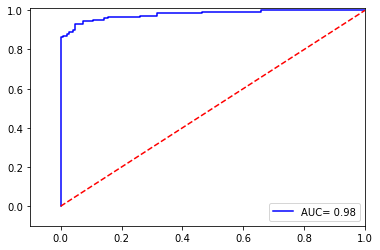

In [296]:
#AUC
y_pred_undersample_score = lr1.fit(X_norm_un_train, Y_norm_un_train.values.ravel()).decision_function(X_norm_un_test.values)
fpr, tpr, thresholds = roc_curve(Y_norm_un_test, y_pred_undersample_score)
roc_auc = auc(fpr, tpr)

#plot ROC
#plt.title("Receiver Operating characteristics")
plt.plot(fpr, tpr, 'b', label="AUC= %0.2f" %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
#plt.xlabel("False positive rate")
#plt.ylabel("True positive rate")
plt.show()


In [297]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(random_state=0)
clf1.fit(X_norm_un_train,Y_norm_un_train)


C:\Users\rohin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [300]:
from __future__ import division
y_under_pred = clf1.predict(X_norm_un_test)
print(confusion_matrix(Y_norm_un_test, y_un_pred))
cnf_matrix = confusion_matrix(Y_norm_un_test, y_un_pred)
np.set_printoptions(precision=2)
print("recall Metric in the test set: ", cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title="Confusion Matrix")
plt.show()


[[142   7]
 [ 13 134]]
recall Metric in the test set:  0.9115646258503401


In [355]:
from sklearn import svm


In [357]:
clf = svm.SVC()
clf.fit(X_norm_un_train,Y_norm_un_train)


C:\Users\rohin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [360]:
from __future__ import division
y_un_pred = clf.predict(X_norm_un_test)
print(confusion_matrix(Y_norm_un_test, y_under_pred))
cnf_matrix = confusion_matrix(Y_norm_un_test, y_under_pred)
np.set_printoptions(precision=2)
print("recall Metric in the test set: ", cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))
class_names = [0,1]


[[149   0]
 [ 23 124]]
recall Metric in the test set:  0.8435374149659864


In [362]:
clf1 = svm.SVC(kernel='linear')
clf1.fit(X_norm_un_train,Y_norm_un_train)


C:\Users\rohin\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [364]:
from __future__ import division
y_under_pred = clf1.predict(X_norm_un_test)
print(confusion_matrix(Y_norm_un_test, y_under_pred))
cnf_matrix = confusion_matrix(Y_norm_un_test, y_under_pred)
np.set_printoptions(precision=2)
print("recall Metric in the test set: ", cnf_matrix[1,1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))


[[149   0]
 [ 23 124]]
recall Metric in the test set:  0.8435374149659864
